# Visualization with Polarplot

(Figure 5 in paper).

Figure panels:

A) Figure with CS grid on polar coordinates

B) Figure with equal area grid

C) Figure with data - to be explained below

Import relevant modules:

In [2]:
%matplotlib inline
import lompe
import apexpy
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font', **{'family': 'sans-serif'})

Re = 6371.2e3    # Earth radius
HI = 110e3       # Ionospheric altitude
time = dt.datetime(2005, 9, 10)

# TODO: update this when polplot is included in Lompe
from polplot import Polarplot

Make a cubed sphere grid:

In [3]:
L, W, Lres, Wres = 5000e3, 5000e3, 100e3, 100e3 # m
position = (-88, 72) # geographic lon, lat of center of grid
orientation = 45     # angle defining orientation of xi-axis
projection = lompe.cs.CSprojection(position, orientation)
grid = lompe.cs.CSgrid(projection, L, W, Lres, Wres, R = Re+HI) # set grid to ionospheric altitude

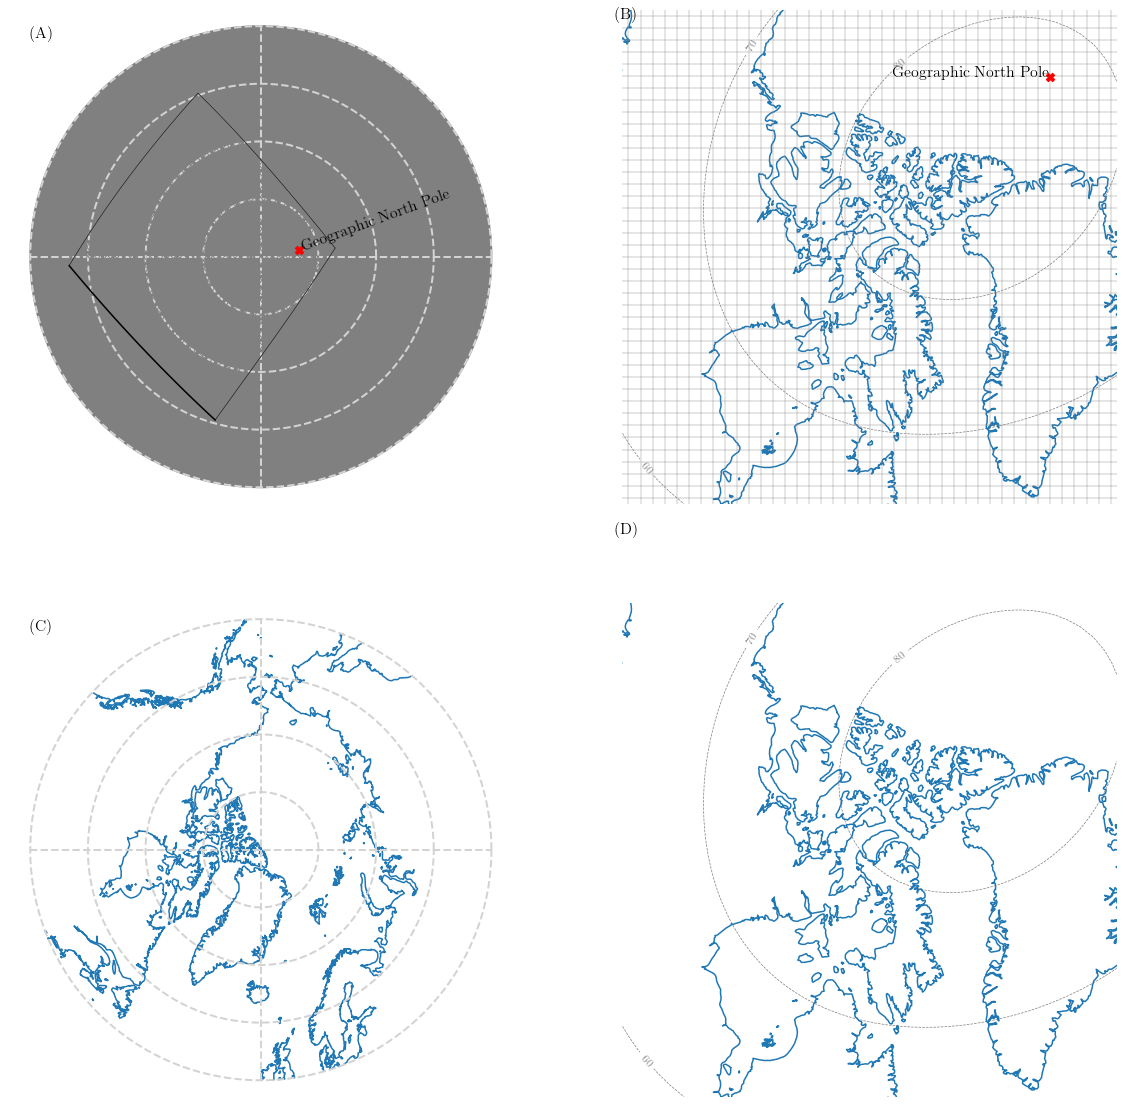

In [19]:
# Start by setting up figure and subplots:
fig = plt.figure(figsize = (20,20))
axs = {}

axs['polar' ] = fig.add_subplot(221)
axs['grid'  ] = fig.add_subplot(222)

axs['polar2'] = fig.add_subplot(223)
axs['grid2' ] = fig.add_subplot(224)

# remove borders from axes and set aspect
for key in axs.keys():
    axs[key].set_axis_off()
    axs[key].set_aspect('equal')

pax = Polarplot(axs['polar' ], minlat = 50, plotgrid = True, linewidth=2)
pax2 = Polarplot(axs['polar2' ], minlat = 50, plotgrid = True, linewidth=2)

# TODO: fix altitudes for apex
# magnetic latitude contours on xi, eta axes
apex = apexpy.Apex(time, refh=HI*1e-3)
mlat, _ = apex.geo2apex(grid.lat, grid.lon, height = HI*1e-3)
latlevels = np.r_[-80:81:10]
co  = axs['grid' ].contour(grid.xi, grid.eta, mlat, linestyles = '--', colors='grey', linewidths=.7, levels=latlevels)
co2 = axs['grid2'].contour(grid.xi, grid.eta, mlat, linestyles = '--', colors='grey', linewidths=.7, levels=latlevels)
axs['grid' ].clabel(co,  co.levels, inline = True, fontsize = 12)
axs['grid2'].clabel(co2, co.levels, inline = True, fontsize = 12)

xlim, ylim = axs['grid'].get_xlim(), axs['grid'].get_ylim()
axs['grid' ].set_xlim(xlim)
axs['grid' ].set_ylim(ylim)
axs['grid2'].set_xlim(xlim)
axs['grid2'].set_ylim(ylim)

# coastlines on polar axes
map_kwargs = {'resolution':'50m', 'category':'physical', 'name':'coastline'}
plot_kwargs = {'color':'C0', 'zorder':1}
pax.coastlines(time, map_kwargs=map_kwargs, plot_kwargs=plot_kwargs)
pax2.coastlines(time,  map_kwargs=map_kwargs, plot_kwargs=plot_kwargs)

# coastlines on grid
for cl in grid.projection.get_projected_coastlines():
    axs['grid' ].plot(cl[0], cl[1], color = 'C0')
    axs['grid2'].plot(cl[0], cl[1], color = 'C0')

# grid on polplot
for lon, lat in grid.get_grid_boundaries():
    mlat, mlon = apex.geo2apex(lat, lon, height=HI*1e-3)
    mlt = apex.mlon2mlt(mlon, time)
    pax.plot(mlat, mlt, color = 'grey', linewidth = 1)
    
# grid outline on polplot
xs = (grid.lon_mesh[0, :], grid.lon_mesh[-1, :], grid.lon_mesh[:, 0], grid.lon_mesh[:, -1])
ys = (grid.lat_mesh[0, :], grid.lat_mesh[-1, :], grid.lat_mesh[:, 0], grid.lat_mesh[:, -1])
for i, c in enumerate(zip(xs, ys)):
    lon, lat = c
    mlat, mlon = apex.geo2apex(lat, lon, 110)
    mlt = apex.mlon2mlt(mlon, time)
    pax.plot(mlat, mlt, color = 'black', linewidth = 1.5 if i == 0 else .5, zorder = 2)

# grid on xi, eta axis
for lon, lat in grid.get_grid_boundaries():
    xi, eta = grid.projection.geo2cube(lon, lat)
    axs['grid'].plot(xi, eta, color = 'grey', linewidth = .4)

# scatter and text on polarplot
a = apexpy.Apex(time, refh=0)
mlat, mlon = a.geo2apex(90, 0, height=0) # lat, lon, North pole
mlt = a.mlon2mlt(mlon, time)
pax.scatter(mlat, mlt, s=70, color='red', zorder=3, marker='X') # like plt.scatter
pax.write(mlat, mlt, ' Geographic North Pole', fontsize=16, rotation=20) # like plt.text

# scatter and text on xi, eta axis
xi, eta = grid.projection.geo2cube(0,90) # lon, lat, North pole
axs['grid'].scatter(xi, eta, s=70, color='red', zorder=3, marker='X')
axs['grid'].text(xi, eta, 'Geographic North Pole ', fontsize=16, ha='right')

# TODO: terminator
#pax.plot_terminator(time, terminatorcolor='grey', shadecolor='grey')


# vectors on polar axis

pax.quiver()

# vectors on xi, eta axis


# add subfigure letters
axs['polar' ].text(-1,  0.95,  '(A)', fontsize=16)
axs['grid'  ].text(-0.33, 0.3, '(B)', fontsize=16)
axs['polar2'].text(-1,  0.95, '(C)', fontsize=16)
axs['grid2' ].text(-0.33, 0.4, '(D)', fontsize=16)

fig.subplots_adjust()

# save figure
fig.savefig('./output_figures/Polarplotexample.png')
fig.savefig('./output_figures/Polarplotexample.pdf')

Plot:

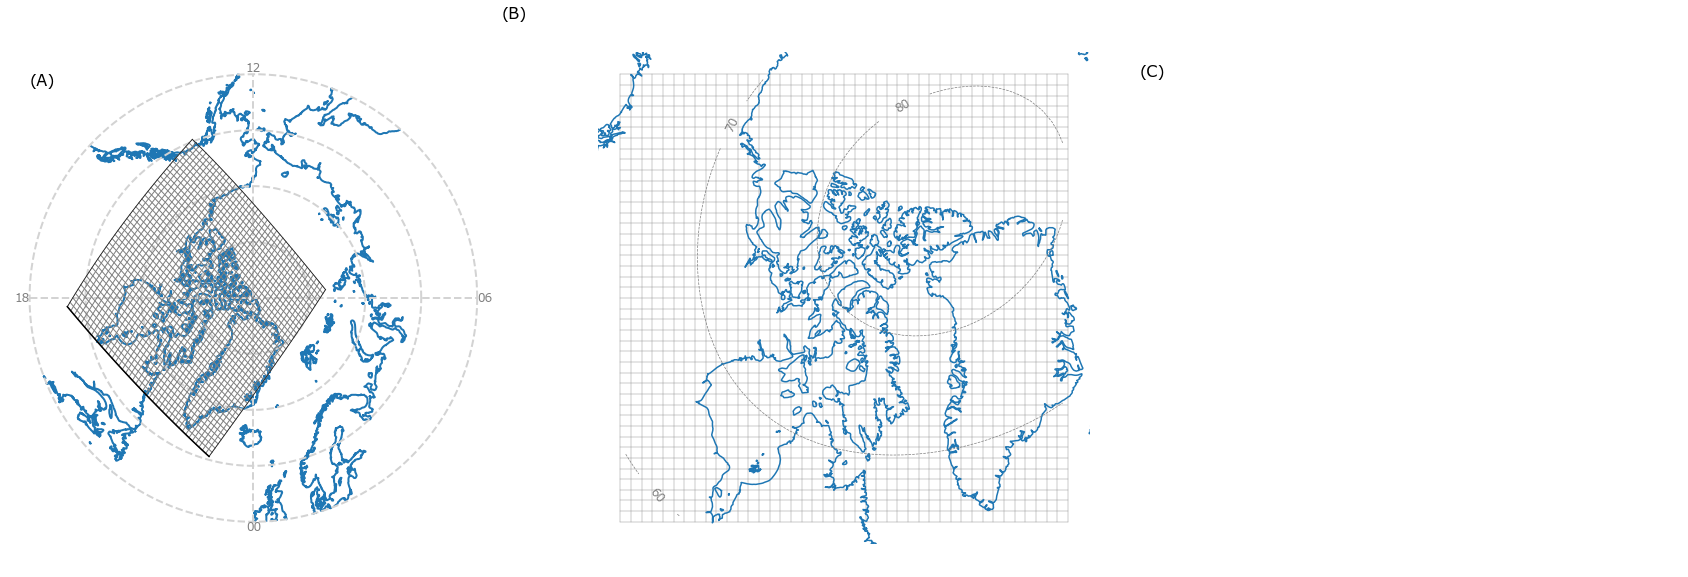

In [3]:
# Start by setting up figure and subplots:
fig = plt.figure(figsize = (30,10))
spec = fig.add_gridspec(1, 3)
axs = {}

axs['polar'] = fig.add_subplot(spec[:, 0:1])
axs['grid' ] = fig.add_subplot(spec[:, 1:2])
axs['data' ] = fig.add_subplot(spec[:, 2:])

# remove borders from axes and set aspect
for key in axs.keys():
    axs[key].set_axis_off()
    axs[key].set_aspect('equal')

# polarplot
apex = apexpy.Apex(time, refh=HI*1e-3)

pax = lompe.visualization.Polarsubplot(axs['polar'], minlat = 50, plotgrid = True, linewidth=2)
pax.writeMLTlabels(color = 'grey', mlat = 50, fontsize = 12)

# coastlines
shpfilename = shpreader.natural_earth(resolution='50m', category='physical', name='coastline')
reader = shpreader.Reader(shpfilename)
coastlines = reader.records()
multilinestrings = []
for coastline in coastlines:
    if coastline.geometry.geom_type == 'MultiLineString':
        multilinestrings.append(coastline.geometry)
        continue

    lon, lat = np.array(coastline.geometry.coords[:]).T 
    lompe.visualization.polarplot_coastline(lon, lat, pax, apex, time, zorder = 1, color='C0')

for mls in multilinestrings:
    for ls in mls:
        lon, lat = np.array(ls.coords[:]).T 
        lompe.visualization.polarplot_coastline(lon, lat, pax, apex, time, zorder = 1, color='C0')

# grid on polarplot
for lon, lat in grid.get_grid_boundaries():
    mlat, mlon = apex.geo2apex(lat, lon, height=HI*1e-3)
    mlt = apex.mlon2mlt(mlon, time)
    pax.plot(mlat, mlt, color = 'grey', linewidth = 1)
    
# grid outline on polarplot
xs = (grid.lon_mesh[0, :], grid.lon_mesh[-1, :], grid.lon_mesh[:, 0], grid.lon_mesh[:, -1])
ys = (grid.lat_mesh[0, :], grid.lat_mesh[-1, :], grid.lat_mesh[:, 0], grid.lat_mesh[:, -1])
for i, c in enumerate(zip(xs, ys)):
    lon, lat = c
    mlat, mlon = apex.geo2apex(lat, lon, 110)
    mlt = apex.mlon2mlt(mlon, time)
    pax.plot(mlat, mlt, color = 'black', linewidth = 1.5 if i == 0 else .5, zorder = 2)

####### grid
for lon, lat in grid.get_grid_boundaries():
    xi, eta = grid.projection.geo2cube(lon, lat)
    axs['grid'].plot(xi, eta, color = 'grey', linewidth = .4)
xlim, ylim = axs['grid'].get_xlim(), axs['grid'].get_ylim()

# coastlines
for cl in grid.projection.get_projected_coastlines():
    axs['grid'].plot(cl[0], cl[1], color = 'C0')

# add magnetic latitude contours
mlat, mlon = apex.geo2apex(grid.lat, grid.lon, height = HI*1e-3)
co = axs['grid'].contour(grid.xi, grid.eta, mlat, linestyles = '--', colors='grey', linewidths=.7,
                         levels = np.r_[-80:81:10])
axs['grid'].clabel(co, co.levels, inline = True, fontsize = 12)

axs['grid'].set_xlim(xlim)
axs['grid'].set_ylim(ylim)

# add subfigure letters
axs['polar'].text(-1, 0.95,  '(A)', fontsize=16)
axs['grid' ].text(-0.5, 0.4, '(B)', fontsize=16)
axs['data' ] .text(-0.1, 0.95, '(C)', fontsize=16)

fig.subplots_adjust()

# save figure
fig.savefig('./output_figures/Polarplotexample.png')
fig.savefig('./output_figures/Polarplotexample.pdf')